# 主成分分析(PCA)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

## d次元 → 1次元

$$
   \| \omega_1 \| = 1 \\
   \bar{x} = \frac{1}{n} \sum_{i=1}^n x_i \\
$$

$$
    \verb| Maximize | \boldsymbol{\omega}_1^T S \boldsymbol{\omega}_1 \\
    \verb| Subject to | \boldsymbol{\omega}_1^T \boldsymbol{\omega}_1 = 1 \\
$$

$$
   S = \frac{1}{n} \sum_{i=1}^n{\boldsymbol{ (x_i - \bar{x})(x_i - \bar{x})^T }} \\
    \phi(\omega_1, \lambda_1) = \frac{1}{2}\boldsymbol{\omega_1^T S \omega_1} - \lambda_1(\boldsymbol{\omega_1^T \omega_1} - 1)
$$

$$
    S \boldsymbol{\omega_1} = \lambda_1 \boldsymbol{\omega_1}
$$

## d次元→c次元

$$
    W^{(c)} = \left(
        \begin{array}{l}
            \omega_1^T \\
            \omega_2^T \\
            \vdots \\
            \omega_c^T
        \end{array}
    \right)
$$

$$
    \left(
        \begin{array}{l}
            \omega_1^Tz \\
            \omega_2^Tz \\
            \vdots \\
            \omega_c^Tz
        \end{array}
    \right)
    = W^{(c)}z
$$

$$
    W = (\omega_1, \omega_2, \ldots,  \omega_d) \\
    SW = W\Lambda \\
$$

$$
    \Lambda = \left(
        \begin{array}{cccc}
            \lambda_1 \\
            &\lambda_2 \\
            & & \ddots \\
            & & &\lambda_d \\
        \end{array}
    \right)
$$    

$$
    SW = W\Lambda \\
    SWW^{-1}= W\Lambda W^{-1} \\
    S= W\Lambda W^{T} \\
$$

## PCAのアルゴリズム

$$
    Y = \left(
        \begin{array}{c}
            (x_1 - \bar{x})^T \\
            (x_2 - \bar{x})^T \\
            \vdots \\
            (x_2 - \bar{x})^T \\
        \end{array}
    \right)
    = \left( x_{ij} - \frac{1}{n} \sum_{k=1}^n{ x_{kj} } \right)\\
    S = \frac{1}{n}Y^TY
$$

### Yを特異値分解

$$
    Y = (U \Sigma V^T)
$$

$$
    \begin{align}
        S &= \frac{1}{n}Y^TY \\
        &=\frac{1}{n}(U \Sigma V)^{T}(U \Sigma V) \\
        &=\frac{1}{n}(V \Sigma U^T)(U \Sigma V) \\
        &= V \left(
            \begin{array}{cccc}
                \sigma_1^{2}/n \\
                & \sigma_2^{2}/n \\
                & & \ddots \\
                & & & \sigma_M^{2}/n \\
            \end{array}
        \right) V^T
    \end {align}
$$

$$
    W = V \\
    \Lambda = \left(
            \begin{array}{cccc}
                \sigma_1^{2}/n \\
                & \sigma_2^{2}/n \\
                & & \ddots \\
                & & & \sigma_M^{2}/n \\
            \end{array}
        \right)
$$

$$
    S= W\Lambda W^{T}= V\Lambda V^{T}　 \\
    y = V^{(c)}x
$$

## 2次元の計算例

In [2]:
import os, subprocess
import csv

In [3]:
filename = "winequality-red.csv"
if not os.path.isfile(filename):
    url = "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv"
    result = subprocess.run(['curl', '-O', url], stdout=subprocess.DEVNULL, stderr=subprocess.DEVNULL)
    print(result)

In [4]:
Xy = []
with open(filename) as fp:
    for row in csv.reader(fp, delimiter=";"):
        Xy.append(row)

Xy = np.array(Xy[1:], dtype=np.float64) # 1行目はヘッダーのため削除
X = Xy[:, :-1]

In [5]:
from solver import PCA

In [6]:
model = PCA(n_components=2)
model.fit(X)

[1346.04000931  304.27090958]


In [7]:
print(model.VT_)

[[ 6.13247431e-03 -3.84465551e-04 -1.70902595e-04 -8.64894648e-03
  -6.37307290e-05 -2.18857434e-01 -9.75678369e-01 -3.72498542e-06
   2.68008619e-04 -2.23381730e-04  6.35846721e-03]
 [-2.38994985e-02 -2.00966661e-03 -3.03480788e-03  1.11348551e-02
  -2.36654751e-04  9.75265982e-01 -2.18916841e-01 -2.49998510e-05
   3.27182194e-03  6.18926046e-04  1.45642451e-02]]


In [8]:
Y = model.transform(X)
print(X.shape)
print(Y.shape)

(1599, 11)
(1599, 2)


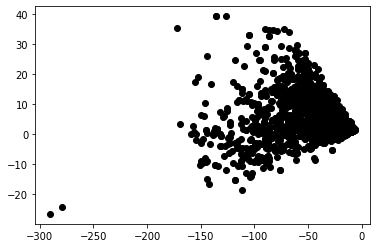

In [9]:
plt.scatter(Y[:, 0], Y[:, 1], color="k")
plt.show()

In [10]:
Y1 = Y[Xy[:, -1] <= 3]
Y2 = Y[Xy[:, -1] == 4]
Y3 = Y[Xy[:, -1] == 5]
Y4 = Y[Xy[:, -1] == 6]
Y5 = Y[Xy[:, -1] == 7]
Y6 = Y[Xy[:, -1] >= 8]

print(len(Y1), len(Y2), len(Y3), len(Y4), len(Y5), len(Y6))

10 53 681 638 199 18


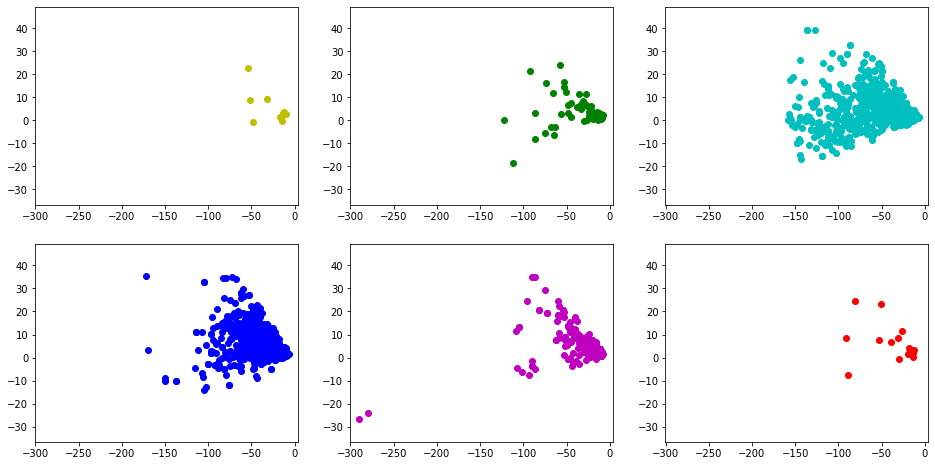

In [11]:
y1min, y1max = Y[:, 0].min(), Y[:, 0].max()
y2min, y2max = Y[:, 1].min(), Y[:, 1].max()

rows, cols = 2, 3
fig, axes= plt.subplots(rows, cols, figsize=(16,8))

for i in range(rows):
    for j in range(cols):
        axes[i, j].set_xlim(y1min-10, y1max+10)
        axes[i, j].set_ylim(y2min-10, y2max+10)

axes[0,0].scatter(Y1[:,0], Y1[:,1], color="y")
axes[0,1].scatter(Y2[:,0], Y2[:,1], color="g")
axes[0,2].scatter(Y3[:,0], Y3[:,1], color="c")
axes[1,0].scatter(Y4[:,0], Y4[:,1], color="b")
axes[1,1].scatter(Y5[:,0], Y5[:,1], color="m")
axes[1,2].scatter(Y6[:,0], Y6[:,1], color="r")

plt.show()

## 3次元の計算例

In [12]:
model = PCA(n_components=3)
model.fit(X)

[1346.04000931  304.27090958   70.39801879]


In [13]:
Y = model.transform(X)

In [14]:
print(model.VT_)

[[-6.13247431e-03  3.84465551e-04  1.70902595e-04  8.64894648e-03
   6.37307290e-05  2.18857434e-01  9.75678369e-01  3.72498542e-06
  -2.68008619e-04  2.23381730e-04 -6.35846721e-03]
 [ 2.38994985e-02  2.00966661e-03  3.03480788e-03 -1.11348551e-02
   2.36654751e-04 -9.75265982e-01  2.18916841e-01  2.49998510e-05
  -3.27182194e-03 -6.18926046e-04 -1.45642451e-02]
 [-9.53135980e-01  2.51315387e-02 -7.37082746e-02 -2.80913620e-01
  -2.94578815e-03 -2.08968395e-02  1.52685886e-03 -7.76139600e-04
   5.86305467e-02 -1.75252442e-02  4.85991164e-02]]


In [15]:
Y1 = [0] * 6

Y1[0] = Y[Xy[:, -1] <= 3]
Y1[1] = Y[Xy[:, -1] == 4]
Y1[2] = Y[Xy[:, -1] == 5]
Y1[3] = Y[Xy[:, -1] == 6]
Y1[4] = Y[Xy[:, -1] == 7]
Y1[5] = Y[Xy[:, -1] >= 8]

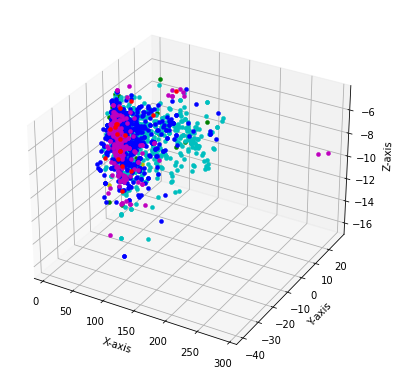

In [16]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(10,5))
ax = Axes3D(fig)

ax.set_xlabel("X-axis")
ax.set_ylabel("Y-axis")
ax.set_zlabel("Z-axis")

colors = ["y", "g", "c", "b", "m", "r"]
for i in range(len(Y1)):
    ax.plot(Y1[i][:,0], Y1[i][:,1], Y1[i][:,2], "o", color=colors[i], ms=4, mew=0.5)

plt.show()

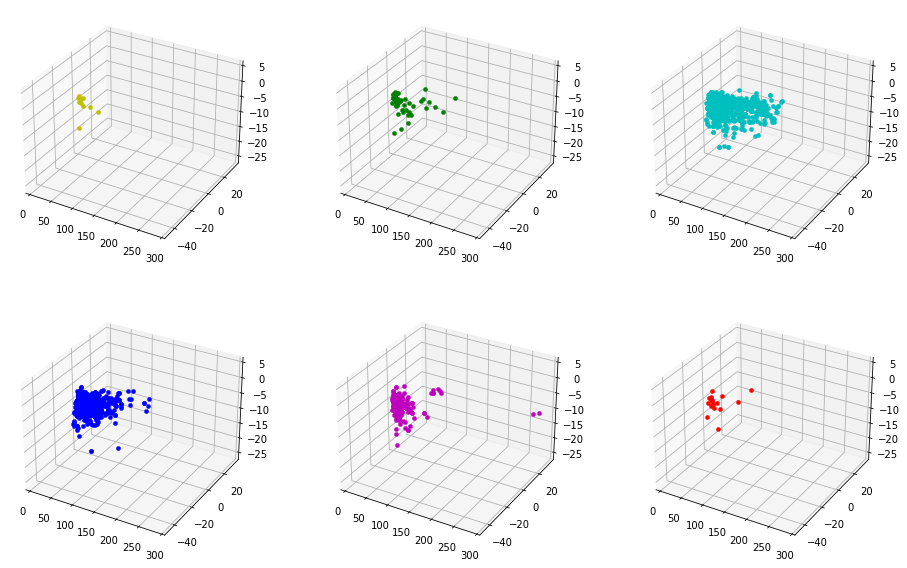

In [17]:
rows, cols = 2, 3
n_gragh = rows * cols

fig = plt.figure(figsize=(16, 10))
ax = [0] * (rows*cols)

# サブプロット作成
count=1
for i in range(rows):
    for j in range(cols):
        ax[count -1 ] = fig.add_subplot(rows, cols, count, projection='3d')
        count += 1

# 表示範囲の設定
ymin, ymax = [0]*3, [0]*3
for i in range(3):
    ymin[i], ymax[i] = Y[:, i].min(), Y[:, i].max()

for i in range(n_gragh):
    ax[i].set_xlim(ymin[0]-10, ymax[0]+10)
    ax[i].set_ylim(ymin[1]-10, ymax[1]+10)
    ax[i].set_zlim(ymin[2]-10, ymax[2]+10)
    
# 散布図の表示
colors = ["y", "g", "c", "b", "m", "r"]
for i in range(n_gragh):
    ax[i].plot(Y1[i][:,0], Y1[i][:,1], Y1[i][:,2], "o", color=colors[i], ms=4, mew=0.5)

plt.show()